# Temperature scaling for calibration.
This notebook uses the pytorch training environment (see README)

Guo et al. (https://arxiv.org/pdf/1706.04599.pdf) introduce an extrmely simple method for improving the calibration of DNNs for classifcation. The logits from a model trained on the training set are rescaled by a temperature factor T, learned from minimizing NLL on the validation set. In particular:
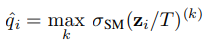

As T-> inf, (raising temperature) softmax approaches maximum entropy. As T -> 0, probability collapses to a hardmax.

In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import pickle
import sys
import random
import os
from common import mytorch

In [2]:
num_epochs = 500

# The logits of the validation set
x = np.load("../../../data/results/VAL_LOGITS_100_sub_MLP_full_with_metadata_300300.npy")

x = torch.Tensor(x)
# The true labels on the validation set
y = pickle.load( open( "../../../data/tts/y_val_ord.pkl", "rb" ) )
y = torch.LongTensor(y)

In [3]:
# Input will be logits, only parameter will be temperature

class TempScale(nn.Module):
    def __init__(self):
        super().__init__()
        self.T = torch.nn.Parameter(torch.Tensor(np.array([1]))) # Initialize to 1
        
    def forward(self,x):
        """
        X is a batch_size x num_classes matrix of a batch of logits.
        """
        output = x / self.T # This is the logit scaled by T
        return output # The external cross entropy loss will implicitely take the softmax

In [4]:
dataset = torch.utils.data.TensorDataset(x,y)
loader = torch.utils.data.DataLoader(dataset,
                                     batch_size=256, 
                                     shuffle=True)
model = TempScale()
opt = torch.optim.Adam(model.parameters(), .01)
loss_func = F.cross_entropy

In [5]:
for e in range(num_epochs):
    print(f"Epoch {e}: \n T is {model.T.data}")
    sum_loss = 0
    sum_accuracy = 0
    sum_nums = 0
    for x_batch,y_batch in loader:
        acc, loss, nums = mytorch.loss_batch(model, loss_func, x_batch, y_batch, opt)
        # print(f"Loss: {loss}, acc: {acc}, nums:{nums}")
        sum_loss += (loss * nums)
        sum_accuracy += (acc * nums)
        sum_nums += nums
    
    print(f"Loss is {sum_loss / sum_nums}")
    print(f"Accuracy is {sum_accuracy / sum_nums}") 

Epoch 0: 
 T is tensor([1.])
Loss is 1.8693834271151228
Accuracy is 0.739351727912677
Epoch 1: 
 T is tensor([1.2772])
Loss is 1.6638459560221588
Accuracy is 0.739351727912677
Epoch 2: 
 T is tensor([1.4712])
Loss is 1.5981998949915674
Accuracy is 0.7393517277210735
Epoch 3: 
 T is tensor([1.5900])
Loss is 1.5788311132182713
Accuracy is 0.73935172789671
Epoch 4: 
 T is tensor([1.6557])
Loss is 1.5735686837972216
Accuracy is 0.739351727912677
Epoch 5: 
 T is tensor([1.6943])
Loss is 1.5722078598762306
Accuracy is 0.7393517279446109
Epoch 6: 
 T is tensor([1.7108])
Loss is 1.5720095633183093
Accuracy is 0.739351727912677
Epoch 7: 
 T is tensor([1.7170])
Loss is 1.5720381623389987
Accuracy is 0.73935172789671
Epoch 8: 
 T is tensor([1.7141])
Loss is 1.5719548344707923
Accuracy is 0.7393517278009083
Epoch 9: 
 T is tensor([1.7203])
Loss is 1.5720039933416947
Accuracy is 0.7393517279605779
Epoch 10: 
 T is tensor([1.7237])
Loss is 1.5719391143484853
Accuracy is 0.73935172789671
Epoch 11: 
 

Loss is 1.5721813380925802
Accuracy is 0.739351727912677
Epoch 91: 
 T is tensor([1.7206])
Loss is 1.572071367379267
Accuracy is 0.7393517277689744
Epoch 92: 
 T is tensor([1.7249])
Loss is 1.5719580946995622
Accuracy is 0.7393517279286439
Epoch 93: 
 T is tensor([1.7226])
Loss is 1.5719766590635482
Accuracy is 0.739351727912677
Epoch 94: 
 T is tensor([1.7253])
Loss is 1.5719746122275924
Accuracy is 0.7393517279286439
Epoch 95: 
 T is tensor([1.7229])
Loss is 1.572416181861955
Accuracy is 0.7393517277051066
Epoch 96: 
 T is tensor([1.7033])
Loss is 1.5722756424443254
Accuracy is 0.7393517277370405
Epoch 97: 
 T is tensor([1.7258])
Loss is 1.5722505178331467
Accuracy is 0.7393517279446109
Epoch 98: 
 T is tensor([1.7331])
Loss is 1.5725348402276742
Accuracy is 0.7393517278807431
Epoch 99: 
 T is tensor([1.7322])
Loss is 1.5720681454711902
Accuracy is 0.739351727912677
Epoch 100: 
 T is tensor([1.7182])
Loss is 1.5721169057110822
Accuracy is 0.7393517279446109
Epoch 101: 
 T is tensor([

Loss is 1.5722556678788322
Accuracy is 0.7393517279286439
Epoch 180: 
 T is tensor([1.7407])
Loss is 1.572581613028685
Accuracy is 0.7393517277370405
Epoch 181: 
 T is tensor([1.7289])
Loss is 1.5720951799857148
Accuracy is 0.7393517277370405
Epoch 182: 
 T is tensor([1.7138])
Loss is 1.5725064431889715
Accuracy is 0.7393517279286439
Epoch 183: 
 T is tensor([1.7261])
Loss is 1.572167285798607
Accuracy is 0.7393517279286439
Epoch 184: 
 T is tensor([1.7182])
Loss is 1.5721021984525958
Accuracy is 0.739351727912677
Epoch 185: 
 T is tensor([1.7401])
Loss is 1.5720963932188592
Accuracy is 0.739351727912677
Epoch 186: 
 T is tensor([1.7054])
Loss is 1.5727597926916719
Accuracy is 0.7393517277530074
Epoch 187: 
 T is tensor([1.7469])
Loss is 1.572154075825403
Accuracy is 0.7393517279286439
Epoch 188: 
 T is tensor([1.7250])
Loss is 1.5720839373010942
Accuracy is 0.73935172789671
Epoch 189: 
 T is tensor([1.7261])
Loss is 1.5720191242673778
Accuracy is 0.7393517277849414
Epoch 190: 
 T is t

Loss is 1.5722915754540496
Accuracy is 0.7393517277689744
Epoch 269: 
 T is tensor([1.7397])
Loss is 1.5722947833112058
Accuracy is 0.7393517279446109
Epoch 270: 
 T is tensor([1.7124])
Loss is 1.5720552763286175
Accuracy is 0.73935172789671
Epoch 271: 
 T is tensor([1.7324])
Loss is 1.5721656336657905
Accuracy is 0.73935172789671
Epoch 272: 
 T is tensor([1.7234])
Loss is 1.5724319408637986
Accuracy is 0.7393517277530074
Epoch 273: 
 T is tensor([1.7380])
Loss is 1.572513975727951
Accuracy is 0.7393517278807431
Epoch 274: 
 T is tensor([1.7153])
Loss is 1.572125430692146
Accuracy is 0.739351727912677
Epoch 275: 
 T is tensor([1.7145])
Loss is 1.5722094151854291
Accuracy is 0.7393517279286439
Epoch 276: 
 T is tensor([1.7426])
Loss is 1.5726452472540127
Accuracy is 0.739351727912677
Epoch 277: 
 T is tensor([1.7059])
Loss is 1.5721368472888455
Accuracy is 0.7393517278807431
Epoch 278: 
 T is tensor([1.7192])
Loss is 1.5721066935657018
Accuracy is 0.73935172789671
Epoch 279: 
 T is tens

Loss is 1.5720206129943721
Accuracy is 0.7393517277849414
Epoch 358: 
 T is tensor([1.7174])
Loss is 1.572315068018842
Accuracy is 0.7393517279446109
Epoch 359: 
 T is tensor([1.7161])
Loss is 1.5719543679961883
Accuracy is 0.73935172789671
Epoch 360: 
 T is tensor([1.7239])
Loss is 1.5721822918626982
Accuracy is 0.7393517279765448
Epoch 361: 
 T is tensor([1.7243])
Loss is 1.5719771531769522
Accuracy is 0.7393517279286439
Epoch 362: 
 T is tensor([1.7299])
Loss is 1.5721789107321416
Accuracy is 0.7393517279286439
Epoch 363: 
 T is tensor([1.7229])
Loss is 1.5720112941362825
Accuracy is 0.7393517277530074
Epoch 364: 
 T is tensor([1.7234])
Loss is 1.5719971653286586
Accuracy is 0.7393517279286439
Epoch 365: 
 T is tensor([1.7332])
Loss is 1.5722945040491545
Accuracy is 0.7393517277051066
Epoch 366: 
 T is tensor([1.7376])
Loss is 1.5719958660336242
Accuracy is 0.7393517277849414
Epoch 367: 
 T is tensor([1.7248])
Loss is 1.5720579725725863
Accuracy is 0.7393517279286439
Epoch 368: 
 T 

Loss is 1.572188017421327
Accuracy is 0.7393517277370405
Epoch 447: 
 T is tensor([1.7206])
Loss is 1.572098788645387
Accuracy is 0.73935172789671
Epoch 448: 
 T is tensor([1.7287])
Loss is 1.571970548637425
Accuracy is 0.7393517279286439
Epoch 449: 
 T is tensor([1.7056])
Loss is 1.572323234956896
Accuracy is 0.739351727912677
Epoch 450: 
 T is tensor([1.7286])
Loss is 1.5720396753357653
Accuracy is 0.739351727912677
Epoch 451: 
 T is tensor([1.7229])
Loss is 1.5720193889356318
Accuracy is 0.7393517279605779
Epoch 452: 
 T is tensor([1.7182])
Loss is 1.5722456315296316
Accuracy is 0.73935172789671
Epoch 453: 
 T is tensor([1.7115])
Loss is 1.5724871796958733
Accuracy is 0.7393517277530074
Epoch 454: 
 T is tensor([1.7379])
Loss is 1.5721320464085422
Accuracy is 0.7393517277530074
Epoch 455: 
 T is tensor([1.7197])
Loss is 1.572442377472639
Accuracy is 0.7393517277689744
Epoch 456: 
 T is tensor([1.7134])
Loss is 1.5720860174441191
Accuracy is 0.7393517279446109
Epoch 457: 
 T is tenso

In [6]:
print(f"The final temperature value is {model.T.data}")

The final temperature value is tensor([1.7226])
